In [1]:
import numpy as np
import pandas as pd
from natsort import natsorted
from ast import literal_eval
import matplotlib.pyplot as plt 
import mne
import os
import re
from mne.time_frequency import tfr_morlet
import time
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
import scipy.stats

In [15]:
#importing data

# ERPs 
erp1,erp2,erp3,erp4,erp5,erp6 = np.load("/home/jeremy/Desktop/erp_pure_tone_all_roi.npy")
std_erp1,std_erp2,std_erp3,std_erp4,std_erp5,std_erp6 = np.load("/home/jeremy/Desktop/erp_std_pure_tone_all_roi.npy")

# mean ITPC 
area1,area2,area3,area4,area5,area6 = np.load("/home/jeremy/Desktop/mean_ITPC_pure_tone_all_roi.npy")

# mean ITPC spectrums 
mean_area1,mean_area2,mean_area3,mean_area4,mean_area5,mean_area6 = np.load("/home/jeremy/Desktop/spectrums_pure_tone_all_roi.npy")
std_mean_area1,std_mean_area2,std_mean_area3,std_mean_area4,std_mean_area5,std_mean_area6 = np.load("/home/jeremy/Desktop/spectrums_std_pure_tone_all_roi.npy")

In [20]:
# window of averaging

y=68
x=238
z=8 
finish=x-y
window= np.round(np.logspace(*np.log10([finish+z, z]), num=200),0)

areabis=np.zeros((200,334))
areabis[:,:]=np.nan
for i,j in enumerate(areabis):
    if i<20:
        j[int(window[i])+68]= 1
    elif i>20 and i< 90:
        j[int(window[i])+68]= 1
    else:
        j[int(window[i])+68]= 1

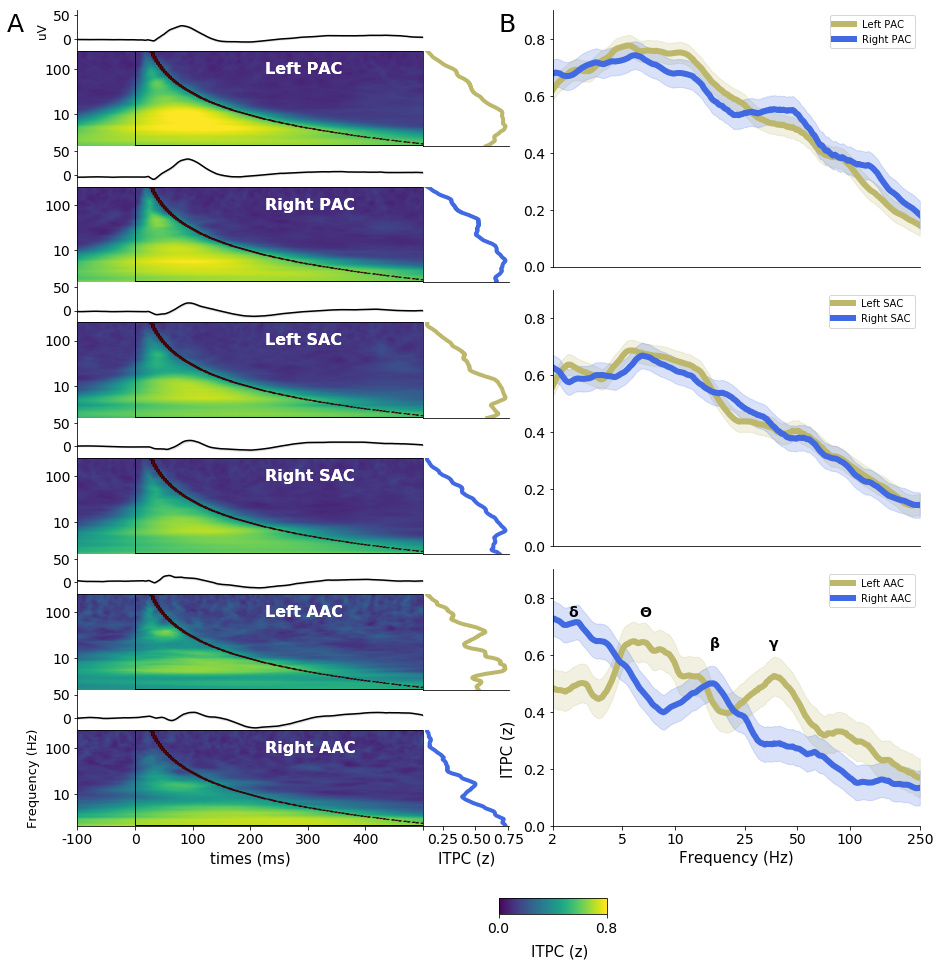

In [33]:
# plotting (way too long)

vmax1=0.8
vmin1=0
nb_suj=[39,27,40,29,12,12]
freqs= np.logspace(*np.log10([2, 250]), num=200)
times=(np.arange(-0.2,0.8,0.003))
y=freqs
x= times*1000
X,Y = np.meshgrid(x,y)

times1=np.arange(-200,800.1,1)

name1='Left PAC'
name2='Right PAC'
name3='Left SAC'
name4='Right SAC'
name5='Left AAC'
name6='Right AAC'
widths = [0.8,0.2]

heights = [0.049,0.116,0.049,0.116,0.049,0.116,0.049,0.116,0.049,0.116,0.049,0.116]#70/30
fig=plt.figure(figsize=(15,15))
gs1 = gridspec.GridSpec(12, 2,width_ratios=widths,height_ratios=heights)
gs1.update(left=0.2, right=0.25, wspace=0, hspace=0)
#################################################

ax1 = plt.subplot(gs1[0, :-1])
ax1.plot(times1,erp1*50,'k') 
ax1.fill_between(times1,50*(erp1-std_erp1/np.sqrt(len(mean_area1))),50*(erp1+std_erp1/np.sqrt(len(mean_area1))),
   alpha=0.2, edgecolor='grey', facecolor='grey') 

ax1.tick_params(labelbottom='off')  
ax1.set_xlim(-100,500)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylim(-25,60)
plt.subplots_adjust(left=0.2, right=0.6, wspace=0, hspace=0.8)
ax1.set_ylabel('uV',fontsize=12)
plt.yticks(fontsize=14)


ax17 = plt.subplot(gs1[1, :-1])
ir=ax17.pcolormesh(X,Y,area1, cmap=plt.cm.viridis,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax17.set_yscale('log', basey=10)
ax17.tick_params(labelbottom='off')  
ax17.set_xlim(-100,500)
ax17.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax17.text(225,80,name1,fontsize=16,color='w',weight='bold')
ax17.get_xaxis().set_ticks([])
plt.tight_layout()
plt.yticks(fontsize=14)


ax17 = plt.subplot(gs1[1, :-1])
ir=ax17.pcolormesh(X,Y,areabis, cmap=plt.cm.jet,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax17.set_yscale('log', basey=10)
ax17.tick_params(labelbottom='off')  
ax17.set_xlim(-100,500)
ax17.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax17.text(225,80,name1,fontsize=16,color='w',weight='bold')
ax17.get_xaxis().set_ticks([])
plt.tight_layout()
plt.yticks(fontsize=14)
plt.vlines(0,0,250,linewidth=1)
plt.hlines(250,0,50,linewidth=2)
plt.hlines(2,0,500,linewidth=2)

ax2=plt.subplot(gs1[1,-1])
ax2.plot(mean_area1,freqs,linewidth=4,color='darkkhaki')
ax2.set_yscale("log")
ax2.set_ylim(2,250)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
######################################################################################


ax33 = plt.subplot(gs1[2, :-1])
ax33.plot(times1,erp2*50,'k') #*1e6
ax33.fill_between(times1,50*(erp2-std_erp2/np.sqrt(len(mean_area2))),50*(erp2+std_erp2/np.sqrt(len(mean_area2))),
   alpha=0.2, edgecolor='grey', facecolor='grey') 
ax33.tick_params(labelbottom='off')  
ax33.set_xlim(-100,500)
ax33.spines['top'].set_visible(False)
ax33.spines['right'].set_visible(False)
gs1.update(left=0.2, right=0.6, wspace=0, hspace=0)
ax33.set_ylim(-25,60)
plt.subplots_adjust(left=0.2, right=0.6, wspace=0, hspace=0.9)
plt.yticks(fontsize=14)



ax3 = plt.subplot(gs1[3, :-1])
ax3.pcolormesh(X,Y,area2, cmap=plt.cm.viridis,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax3.set_yscale('log', basey=10)
ax3.tick_params(labelbottom='off')  
ax3.set_xlim(-100,500)
ax3.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax3.text(225,80,name2,fontsize=16,color='w',weight='bold')
ax3.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)


ax3 = plt.subplot(gs1[3, :-1])
ax3.pcolormesh(X,Y,areabis, cmap=plt.cm.jet,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax3.set_yscale('log', basey=10)
ax3.tick_params(labelbottom='off')  
ax3.set_xlim(-100,500)
ax3.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax3.text(225,80,name2,fontsize=16,color='w',weight='bold')
ax3.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)
plt.vlines(0,0,250,linewidth=1)
plt.hlines(250,0,50,linewidth=2)
plt.hlines(2,0,500,linewidth=2)

ax4 = plt.subplot(gs1[3, -1])
ax4.plot(mean_area2,freqs,linewidth=4, color='royalblue')
ax4.set_yscale("log")
ax4.set_ylim(2,250)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

##########################################################################################

ax44 = plt.subplot(gs1[4, :-1])
ax44.plot(times1,erp3*50,'k') 
ax44.fill_between(times1,50*(erp3-std_erp3/np.sqrt(len(mean_area3))),50*(erp3+std_erp3/np.sqrt(len(mean_area3))),
   alpha=0.2, edgecolor='grey', facecolor='grey') 
ax44.tick_params(labelbottom='off')  
ax44.set_xlim(-100,500)
ax44.spines['top'].set_visible(False)
ax44.spines['right'].set_visible(False)
ax44.set_ylim(-25,60)
plt.yticks(fontsize=14)

gs1.update(left=0.2, right=0.6, wspace=0, hspace=0)

ax5 = plt.subplot(gs1[5, :-1])
ax5.pcolormesh(X,Y,area3, cmap=plt.cm.viridis,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax5.set_yscale('log', basey=10)
ax5.tick_params(labelbottom='off')  
ax5.set_xlim(-100,500)
ax5.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax5.text(225,80,name3,fontsize=16,color='w',weight='bold')
ax5.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)


ax5 = plt.subplot(gs1[5, :-1])
ax5.pcolormesh(X,Y,areabis, cmap=plt.cm.jet,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax5.set_yscale('log', basey=10)
ax5.tick_params(labelbottom='off')  
ax5.set_xlim(-100,500)
ax5.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax5.text(225,80,name3,fontsize=16,color='w',weight='bold')
ax5.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)
plt.vlines(0,0,250,linewidth=1)
plt.hlines(2,0,500,linewidth=2)
plt.hlines(250,0,50,linewidth=2)

gs1.update(left=0.2, right=0.6, wspace=0, hspace=0.5)


ax4 = plt.subplot(gs1[5, -1])
ax4.plot(mean_area3,freqs,linewidth=4, color='darkkhaki')
ax4.set_yscale("log")
ax4.set_ylim(2,250)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

#################################################################################

gs1.update(left=0.2, right=0.6, wspace=0, hspace=0.5)

ax77 = plt.subplot(gs1[6, :-1])
ax77.plot(times1,erp4*50,'k') #*1e6
ax77.fill_between(times1,50*(erp4-std_erp4/np.sqrt(len(mean_area4))),50*(erp4+std_erp4/np.sqrt(len(mean_area4))),
   alpha=0.2, edgecolor='grey', facecolor='grey') 
ax77.tick_params(labelbottom='off')  
ax77.set_xlim(-100,500)
ax77.spines['top'].set_visible(False)
ax77.spines['right'].set_visible(False)
ax77.set_ylim(-25,60)
plt.yticks(fontsize=14)


gs1.update(left=0.2, right=0.6, wspace=0, hspace=0)

ax7 = plt.subplot(gs1[7, :-1])
ax7.pcolormesh(X,Y,area4, cmap=plt.cm.viridis,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax7.set_yscale('log', basey=10)
ax7.tick_params(labelbottom='off')  
ax7.set_xlim(-100,500)
ax7.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax7.text(225,80,name4,fontsize=16,color='w',weight='bold')
ax7.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)


ax7 = plt.subplot(gs1[7, :-1])
ax7.pcolormesh(X,Y,areabis, cmap=plt.cm.jet,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax7.set_yscale('log', basey=10)
ax7.tick_params(labelbottom='off')  
ax7.set_xlim(-100,500)
ax7.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax7.text(225,80,name4,fontsize=16,color='w',weight='bold')
ax7.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)
plt.vlines(0,0,250,linewidth=1)
plt.hlines(250,0,50,linewidth=2)
plt.hlines(2,0,500,linewidth=2)




ax8=plt.subplot(gs1[7,-1])
ax8.plot(mean_area4,freqs,linewidth=4,color='royalblue')
ax8.set_yscale("log")
ax8.set_ylim(2,250)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)

###############################################################################################

ax99 = plt.subplot(gs1[8, :-1])
ax99.plot(times1,erp5*50,'k')#*1e6
ax99.fill_between(times1,50*(erp5-std_erp5/np.sqrt(len(mean_area5))),50*(erp5+std_erp5/np.sqrt(len(mean_area5))),
   alpha=0.2, edgecolor='grey', facecolor='grey') 
ax99.tick_params(labelbottom='off')  
ax99.set_xlim(-100,500)
ax99.spines['top'].set_visible(False)
ax99.spines['right'].set_visible(False)
ax99.set_ylim(-25,60)
plt.yticks(fontsize=14)

ax9 = plt.subplot(gs1[9, :-1])
ax9.pcolormesh(X,Y,area5, cmap=plt.cm.viridis,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax9.set_yscale('log', basey=10)
ax9.tick_params(labelbottom='off')  
ax9.set_xlim(-100,500)
ax9.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax9.text(225,80,name5,fontsize=16,color='w',weight='bold')
ax9.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)


ax9 = plt.subplot(gs1[9, :-1])
ax9.pcolormesh(X,Y,areabis, cmap=plt.cm.jet,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax9.set_yscale('log', basey=10)
ax9.tick_params(labelbottom='off')  
ax9.set_xlim(-100,500)
ax9.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.minorticks_off() 
ax9.text(225,80,name5,fontsize=16,color='w',weight='bold')
ax9.get_xaxis().set_ticks([])
plt.yticks(fontsize=14)
plt.vlines(0,0,250,linewidth=1)
plt.hlines(250,0,50,linewidth=2)
plt.hlines(2,0,500,linewidth=2)


ax10=plt.subplot(gs1[9,-1])
ax10.plot(mean_area5,freqs,linewidth=4,color='darkkhaki')
ax10.set_yscale("log")
ax10.set_ylim(2,250)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
################################################################################################################


ax111 = plt.subplot(gs1[10, :-1])
ax111.plot(times1,erp6*50,'k')#*1e6
ax111.fill_between(times1,50*(erp6-std_erp6/np.sqrt(len(mean_area6))),50*(erp6+std_erp6/np.sqrt(len(mean_area6))),
   alpha=0.2, edgecolor='grey', facecolor='grey') 


ax111.set_xlim(-100,500)
ax111.set_xlabel('times (ms)',fontsize=15)
plt.gca().axes.get_xaxis().set_visible(False)
ax111.spines['top'].set_visible(False)
ax111.spines['right'].set_visible(False)
ax111.set_ylim(-25,60)
plt.yticks(fontsize=14)

ax11 = plt.subplot(gs1[11, :-1])
im10=ax11.pcolormesh(X,Y,area6, cmap=plt.cm.viridis,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax11.set_yscale('log', basey=10)
ax11.set_xlim(-100,500)
ax11.text(225,80,name6,fontsize=16,color='w',weight='bold')
ax11.set_xlabel('times (ms)',fontsize=15)
ax11.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax11.set_ylabel('Frequency (Hz)',fontsize=13)
plt.minorticks_off() 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax11 = plt.subplot(gs1[11, :-1])
im=ax11.pcolormesh(X,Y,areabis, cmap=plt.cm.jet,vmax=vmax1,vmin=vmin1, shading='gouraud')
ax11.set_yscale('log', basey=10)
ax11.set_xlim(-100,500)
ax11.text(225,80,name6,fontsize=16,color='w',weight='bold')
ax11.set_xlabel('times (ms)',fontsize=15)
ax11.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax11.set_ylabel('Frequency (Hz)',fontsize=13)
plt.minorticks_off() 
plt.xticks([-100,0,100,200,300,400,500],['-100','0','100','200','300','400',' '])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.vlines(0,0,250,linewidth=1)
plt.hlines(250,0,50,linewidth=2)
plt.hlines(2,0,500,linewidth=2)



cbaxes = fig.add_axes([0.59, 0.043, 0.1, 0.015]) 
cb = plt.colorbar(im10, ticks=[0, 0.8],cax = cbaxes,orientation="horizontal")  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax12=plt.subplot(gs1[11,-1])
ax12.plot(mean_area6,freqs,linewidth=4,color='royalblue')
ax12.set_yscale("log")
ax12.set_ylim(2,250)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(True)
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax12.set_xlabel('ITPC (z)', fontsize=15)

gs2 = gridspec.GridSpec(12, 2)
gs2.update(left=0.64, right=0.98, hspace=0.5)
ax13=plt.subplot(gs2[0:4,:])

def F(a,a0):
    idx = np.abs(a - a0).argmin()
    return a.flat[idx]
def I(a,a0):
    idx = np.abs(a - a0).argmin()
    return idx

colorg = 'darkkhaki'
colord = 'royalblue'
lw = 6


ax13.plot(freqs,mean_area1, linewidth=lw,label=name1,color=colorg)
ax13.fill_between(freqs,mean_area1-std_mean_area1/np.sqrt(nb_suj[0]),mean_area1+std_mean_area1/np.sqrt(nb_suj[0]),
   alpha=0.2, edgecolor=colorg, facecolor=colorg) 
ax13.plot(freqs,mean_area2,linewidth=lw,label=name2,color=colord)
ax13.fill_between(freqs,mean_area2-std_mean_area2/np.sqrt(nb_suj[1]),mean_area2+std_mean_area2/np.sqrt(nb_suj[1]),
   alpha=0.2, edgecolor=colord, facecolor=colord)  



ax13.spines['top'].set_visible(False)
ax13.spines['right'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale("log")
plt.xlim(2,250)
plt.legend()
plt.ylim(0,0.9)
ax13.set_yticks(np.round(np.linspace(0, 0.8,5), 2))
ax13.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


ax14=plt.subplot(gs2[4:8,:])
ax14.plot(freqs,mean_area3, linewidth=6,label=name3,color='darkkhaki')
ax14.fill_between(freqs,mean_area3-std_mean_area3/np.sqrt(nb_suj[2]),mean_area3+std_mean_area3/np.sqrt(nb_suj[2]),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax14.plot(freqs,mean_area4,linewidth=6,label=name4,color='royalblue')
ax14.fill_between(freqs,mean_area4-std_mean_area4/np.sqrt(nb_suj[3]),mean_area4+std_mean_area4/np.sqrt(nb_suj[3]),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax14.spines['top'].set_visible(False)
ax14.spines['right'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.xscale("log")
plt.xlim(2,250)
plt.ylim(0,0.9)
ax14.set_yticks(np.round(np.linspace(0, 0.8,5), 2))
ax14.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend()


ax15=plt.subplot(gs2[8:12,:])


ax15.plot(freqs,mean_area5, linewidth=6,label=name5,color='darkkhaki')
ax15.fill_between(freqs,mean_area5-std_mean_area5/np.sqrt(nb_suj[4]),mean_area5+std_mean_area5/np.sqrt(nb_suj[4]),
   alpha=0.2, edgecolor='darkkhaki', facecolor='darkkhaki') 
ax15.plot(freqs,mean_area6,linewidth=6,label=name6,color='royalblue')
ax15.fill_between(freqs,mean_area6-std_mean_area6/np.sqrt(nb_suj[5]),mean_area6+std_mean_area6/np.sqrt(nb_suj[5]),
   alpha=0.2, edgecolor='royalblue', facecolor='royalblue')  
ax15.spines['top'].set_visible(False)
ax15.spines['right'].set_visible(False)
ax15.set_xlabel('Frequency (Hz)', fontsize=15)
plt.xscale("log")
plt.xlim(2,250)
plt.ylim(0,0.9)
ax15.set_yticks(np.round(np.linspace(0, 0.8,5), 2))
ax15.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax15.set_ylabel('ITPC (z)', fontsize=15)
ax15.yaxis.set_label_coords(-.1, 0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

from matplotlib import ticker


ax15.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax15.xaxis.set_minor_formatter(ticker.NullFormatter())
ax15.xaxis.set_minor_locator(ticker.NullLocator())

# Define values
n_values = 7
tick_vals= np.array([2,5,10,25,50,100,250])
tick_vals=tick_vals.astype(int)
ax15.set_xticks(tick_vals)






plt.legend()

fig.text(0.135,0.86,'A',fontsize=25)
fig.text(0.59,0.86,'B',fontsize=25)
fig.text(0.62,0.0045,'ITPC (z)',fontsize=15)

fig.text(0.655, 0.319, u'\u03B4' ,weight='bold',  fontsize=14)
fig.text(0.72, 0.319, u'\u0398' ,weight='bold',  fontsize=14)
fig.text(0.786, 0.29,  u'\u03B2' , weight='bold', fontsize=14)
fig.text(0.84, 0.29,  u'\u03B3' ,weight='bold', fontsize=14);